> Pasar el mismo dataset de firmas con Nombre o Razon Social

Buscar un dataset geografico del Censo a nivel nacional 

Calcular distancias (euclidiana/tiempo de viaje) a:
- Aeropuertos
- Puertos
- Lima
- Capital (distrito)
- Base de datos que me pasara Antonio

In [6]:
import requests
import urbanpy as up
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [182]:
df_firmas = pd.read_csv("outputs/geocoded_df_ccpp.geojson.csv", index_col=0)

In [184]:
gdf = gpd.GeoDataFrame(
    data=df_firmas,
    geometry=gpd.points_from_xy(df_firmas['lon'], df_firmas['lat']),
    crs='EPSG:4326'
)

In [185]:
gdf.index

Int64Index([ 73740,  36523, 103983, 141261, 229733,  36147,  44749, 191355,
            192639, 165063,
            ...
            196544,   9914, 175906, 124772, 137779, 173828, 230068,  12497,
             12658, 227788],
           dtype='int64', length=191736)

In [187]:
gdf.shape

(191736, 14)

In [188]:
# Zona de analisis
departamentos = gpd.read_file('inputs/departamentos/')
res = 4
peru_hexs = up.geom.gen_hexagons(res, departamentos)
print(f'Hex count @ res {res}:', peru_hexs.shape[0])

/Users/claudio/.pyenv/versions/peru-connect-env/lib/python3.9/site-packages/urbanpy/geom/geom.py:168: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  city_poly = city.explode().reset_index(drop=True)


Hex count @ res 4: 634


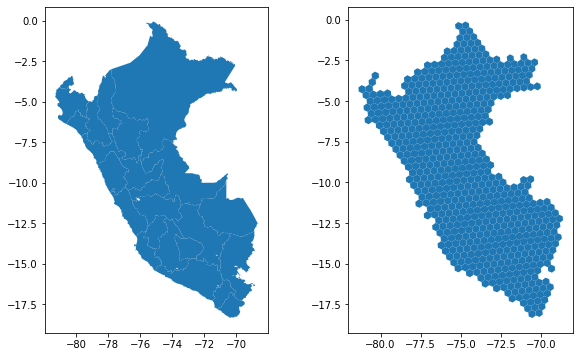

In [189]:
# Visualicemos el mapa de departamentos y hexagonos
fig, axes = plt.subplots(1, 2, figsize=(10,6))
departamentos.plot(ax=axes[0])
peru_hexs.plot(ax=axes[1])
plt.show()

In [190]:
infraestructura = pd.read_excel('inputs/Infraestructuras_Georef.xlsx', header=[0,1,2], index_col=0)

In [191]:
infraestructura

Ubicación Geo-referenciada                                    \
                          Longitud              Latitud                
Infraes                          G   M        S       G   M        S   
1                              -76  57   9.3600     -12  11  40.0920   
2                              -71  30  38.6316     -16  24  55.3391   
3                              -77   7  23.1240     -11  59  52.1880   
4                              -73  15  43.1981      -3  45  57.6899   
5                              -72  52  56.8504     -13  37  56.8309   
...                            ...  ..      ...     ...  ..      ...   
1249                           -79   1  57.0000      -8   7   1.0000   
1250                           -71  32  37.0000     -16  23  15.0000   
1251                           -71  32  37.0000     -16  23  15.0000   
1252                           -71  32  37.0000     -16  23  15.0000   
1253                           -71  32  14.6400     -16  24   3.7600   

        Ubicación geográfica                                        \
                Departamento          Provincia           Distrito   
Infraes   Unnamed: 7_level_2 Unnamed: 8_level_2 Unnamed: 9_level_2   
1                       LIMA               LIMA  VILLA EL SALVADOR   
2                   AREQUIPA           AREQUIPA         PAUCARPATA   
3                     CALLAO             CALLAO             CALLAO   
4                     LORETO             MAYNAS              BELEN   
5                   APURÍMAC            ABANCAY            ABANCAY   
...                      ...                ...                ...   
1249             LA LIBERTAD           TRUJILLO           TRUJILLO   
1250                AREQUIPA           AREQUIPA          YANAHUARA   
1251                AREQUIPA           AREQUIPA          YANAHUARA   
1252                AREQUIPA           AREQUIPA          YANAHUARA   
1253                AREQUIPA           AREQUIPA           AREQUIPA   

        Codigo Centros Poblados Atendidos Nodo (9)  
                               Unnamed: 10_level_1  
Infraes                        Unnamed: 10_level_2  
1                                       1501420001  
2                                        401120001  
3                                        701010001  
4                                       1601120031  
5                                        301010001  
...                                            ...  
1249                                    1301010001  
1250                                     401260001  
1251                                     401260001  
1252                                     401260001  
1253                                     401260001  

[1253 rows x 10 columns]

In [192]:
infraestructura['lon'] = \
infraestructura['Ubicación Geo-referenciada']['Longitud']['G'] + \
infraestructura['Ubicación Geo-referenciada']['Longitud']['M'] / 60 + \
infraestructura['Ubicación Geo-referenciada']['Longitud']['S'] / 3600

In [193]:
infraestructura['lat'] = \
infraestructura['Ubicación Geo-referenciada']['Latitud']['G'] + \
infraestructura['Ubicación Geo-referenciada']['Latitud']['M'] / 60 + \
infraestructura['Ubicación Geo-referenciada']['Latitud']['S'] / 3600

In [194]:
infraestructura.columns

MultiIndex([(                'Ubicación Geo-referenciada', ...),
            (                'Ubicación Geo-referenciada', ...),
            (                'Ubicación Geo-referenciada', ...),
            (                'Ubicación Geo-referenciada', ...),
            (                'Ubicación Geo-referenciada', ...),
            (                'Ubicación Geo-referenciada', ...),
            (                      'Ubicación geográfica', ...),
            (                      'Ubicación geográfica', ...),
            (                      'Ubicación geográfica', ...),
            ('Codigo Centros Poblados Atendidos Nodo (9)', ...),
            (                                       'lon', ...),
            (                                       'lat', ...)],
           names=[None, None, 'Infraes'])

In [195]:
infraestructura = infraestructura.iloc[:,-6:]

In [196]:
infraestructura.columns = ['Departamento', 'Provincia', 'Distrito', 'CCPP Atendidos Nodo (9)', 'lon', 'lat']

In [197]:
infraestructura

,Departamento,Provincia,Distrito,CCPP Atendidos Nodo (9),lon,lat
1,LIMA,LIMA,VILLA EL SALVADOR,1501420001,-75.047400,-11.805530
2,AREQUIPA,AREQUIPA,PAUCARPATA,401120001,-70.489269,-15.584628
3,CALLAO,CALLAO,CALLAO,701010001,-76.876910,-10.002170
4,LORETO,MAYNAS,BELEN,1601120031,-72.738001,-2.233975
5,APURÍMAC,ABANCAY,ABANCAY,301010001,-71.117542,-12.367547
...,...,...,...,...,...,...
1249,LA LIBERTAD,TRUJILLO,TRUJILLO,1301010001,-78.967500,-7.883056
1250,AREQUIPA,AREQUIPA,YANAHUARA,401260001,-70.456389,-15.612500
1251,AREQUIPA,AREQUIPA,YANAHUARA,401260001,-70.456389,-15.612500
1252,AREQUIPA,AREQUIPA,YANAHUARA,401260001,-70.456389,-15.612500


In [198]:
# Get distance and indexes from nearest points 
dist, ind = up.utils.nn_search(
    tree_features = infraestructura[['lat', 'lon']].values, # Point of Interest
    query_features = gdf[['lat', 'lon']].values, # Hexagon
    metric='manhattan' # Distance metric
)

In [199]:
# Add nearest health facility index to the hexagon gdf
gdf['nearest_infraestucture_ix'] = ind

In [200]:
gdf['nearest_infraestucture_distance_km'] = dist

In [201]:
gdf['nearest_infraestucture_distance_km'].describe()

count    191736.000000
mean          0.299868
std           0.296248
min           0.001027
25%           0.106801
50%           0.168075
75%           0.472145
max           3.798013
Name: nearest_infraestucture_distance_km, dtype: float64

<AxesSubplot:>

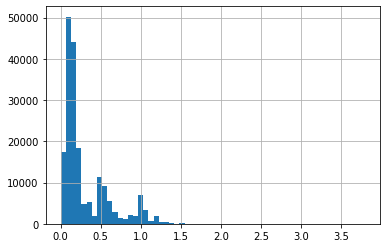

In [202]:
gdf['nearest_infraestucture_distance_km'].hist(bins=59)

## Descarga de aeropuertos

In [203]:
airports = gpd.read_file('inputs/aeropuerto.zip')

In [204]:
airports.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Cod_FACC    34 non-null     object  
 1   Cod_IGN     34 non-null     object  
 2   Rasgo_Prin  34 non-null     object  
 3   Categoria   34 non-null     object  
 4   Nombre      25 non-null     object  
 5   Distrito    34 non-null     object  
 6   Provincia   34 non-null     object  
 7   Departa     34 non-null     object  
 8   Cod_Hoja    34 non-null     object  
 9   Caracteris  34 non-null     object  
 10  Administra  34 non-null     object  
 11  Tipo_Super  34 non-null     object  
 12  X           34 non-null     float64 
 13  Y           34 non-null     float64 
 14  geometry    34 non-null     geometry
dtypes: float64(2), geometry(1), object(12)
memory usage: 4.1+ KB


In [205]:
airports.head()

,Cod_FACC,Cod_IGN,Rasgo_Prin,Categoria,Nombre,Distrito,Provincia,Departa,Cod_Hoja,Caracteris,Administra,Tipo_Super,X,Y,geometry
0,GB005,T0020,AEROPUERTO,ALTERNO,None,PUTUMAYO,MAYNAS,LORETO,1-m,EN CONSTRUCCIÓN,Desconocido,SUPERFÍCIE SUAVE,-75.245390,-0.123544,POINT (-75.24539 -0.12354)
1,GB005,T0020,AEROPUERTO,ALTERNO,ANTA,ANTA,CARHUÁS,ANCASH,19-h,Mas de 800 m. Largo,CORPAC S.A,SUPERFÍCIE DURA,-77.597732,-9.348183,POINT (-77.59773 -9.34818)
2,GB005,T0020,AEROPUERTO,ALTERNO,CHACHAPOYAS,CHACHAPOYAS,CHACHAPOYAS,AMAZONAS,13-h,Mas de 800 m. Largo,CORPAC S.A,SUPERFÍCIE SUAVE,-77.856801,-6.201721,POINT (-77.85680 -6.20172)
3,GB005,T0020,AEROPUERTO,INTERNACIONAL - SOLO COMO,BASE AÉREA DE PISCO (FAP),PARACAS,PISCO,ICA,28-k,Mas de 800 m. Largo,CORPAC S.A,SUPERFÍCIE DURA,-76.222186,-13.745007,POINT (-76.22219 -13.74501)
4,GB005,T0020,AEROPUERTO,ALTERNO,None,JUANJUÍ,MARISCAL CÁCERES,SAN MARTÍN,15-j,Mas de 800 m. Largo,CORPAC S.A,SUPERFÍCIE SUAVE,-76.728548,-7.169682,POINT (-76.72855 -7.16968)


In [272]:
# Get distance and indexes from nearest points 
dist, ind = up.utils.nn_search(
    tree_features = airports[['Y', 'X']].values, # Point of Interest
    query_features = gdf[['lat', 'lon']].values, # Hexagon
    metric='haversine' # Distance metric
)
# Add nearest health facility index to the hexagon gdf
gdf['nearest_airports_ix'] = ind
gdf['nearest_airports_distance_km'] = dist

In [274]:
gdf['nearest_airports_distance_km'].describe()

count    191736.000000
mean         22.321819
std          33.334685
min           0.043287
25%           6.960482
50%          11.859614
75%          18.845717
max         237.548675
Name: nearest_airports_distance_km, dtype: float64

<AxesSubplot:>

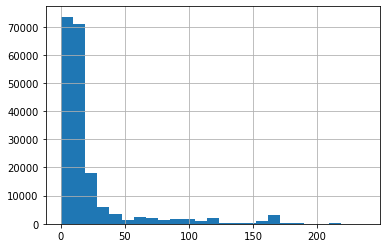

In [276]:
gdf['nearest_airports_distance_km'].hist(bins=25)

## Descarga de puertos

In [207]:
ports = gpd.read_file('inputs/puerto.zip')

In [208]:
ports.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Cod_FACC    33 non-null     object  
 1   Cod_IGN     33 non-null     object  
 2   Rasgo_Prin  33 non-null     object  
 3   Rasgo_Secu  33 non-null     object  
 4   Categoria   33 non-null     object  
 5   Distrito    33 non-null     object  
 6   Provincia   33 non-null     object  
 7   Departa     33 non-null     object  
 8   Cod_Hoja    33 non-null     object  
 9   X           33 non-null     float64 
 10  Y           33 non-null     float64 
 11  geometry    33 non-null     geometry
dtypes: float64(2), geometry(1), object(9)
memory usage: 3.2+ KB


In [209]:
ports.head()

,Cod_FACC,Cod_IGN,Rasgo_Prin,Rasgo_Secu,Categoria,Distrito,Provincia,Departa,Cod_Hoja,X,Y,geometry
0,BB005,H0280,PUERTO,MARÍTIMO,MENOR,MARCONA,NAZCA,ICA,31-m,-75.159847,-15.357865,POINT (-75.15985 -15.35786)
1,BB005,H0280,PUERTO,MARÍTIMO,MENOR,CHANCAY,HUARAL,LIMA,24-i,-77.274030,-11.584820,POINT (-77.27403 -11.58482)
2,BB005,H0280,PUERTO,MARÍTIMO,MENOR,HUACHO,HUARAL,LIMA,23-h,-77.614353,-11.123276,POINT (-77.61435 -11.12328)
3,BB005,H0280,PUERTO,MARÍTIMO,MENOR,SUPE PUERTO,BARRANCA,LIMA,22-h,-77.745241,-10.800293,POINT (-77.74524 -10.80029)
4,BB005,H0280,PUERTO,MARÍTIMO,MENOR - CALETA,BARRANCA,BARRANCA,LIMA,22-h,-77.762490,-10.767458,POINT (-77.76249 -10.76746)


In [277]:
# Get distance and indexes from nearest points 
dist, ind = up.utils.nn_search(
    tree_features = ports[['Y', 'X']].values, # Point of Interest
    query_features = gdf[['lat', 'lon']].values, # Hexagon
    metric='haversine' # Distance metric
)
# Add nearest health facility index to the hexagon gdf
gdf['nearest_ports_ix'] = ind
gdf['nearest_ports_distance_km'] = dist

In [278]:
gdf['nearest_ports_distance_km'].describe()

count    191736.000000
mean         57.659447
std          85.095898
min           0.080503
25%          13.024669
50%          19.461194
75%          66.660129
max         654.502156
Name: nearest_ports_distance_km, dtype: float64

<AxesSubplot:>

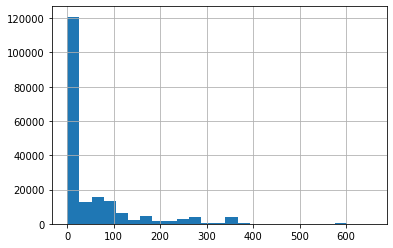

In [280]:
gdf['nearest_ports_distance_km'].hist(bins=25)

### Distancia a Lima

In [212]:
lima = up.download.nominatim_osm('Lima Metropolitana')

In [282]:
# Get distance and indexes from Lima
dist, ind = up.utils.nn_search(
    tree_features = [[lima.centroid[0].y, lima.centroid[0].x]], # Point of Interest
    query_features = gdf[['lat', 'lon']].values, # Hexagon
    metric='haversine' # Distance metric
)

gdf['distance_km_to_lima'] = dist

In [283]:
gdf['distance_km_to_lima'].describe()

count    191736.000000
mean        247.705166
std         320.932753
min           0.031612
25%          14.794946
50%          20.093464
75%         494.609755
max        1317.784630
Name: distance_km_to_lima, dtype: float64

<AxesSubplot:>

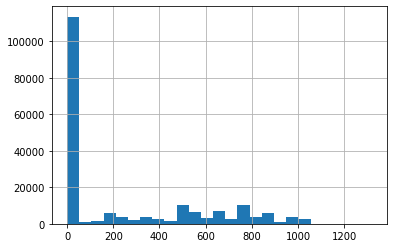

In [285]:
gdf['distance_km_to_lima'].hist(bins=25)

### Distancia a la Capital de la provincia

In [215]:
rucs = pd.read_stata('inputs/rucs_firmas_20142020_v2.dta')

In [216]:
rucs.columns

Index(['ruc', 'RAZON_SOCIAL', 'NOMBRE_COMERCIAL', 'CODIGO_TIPO_VIA',
       'DESCRIPCION_TIPO_VIA', 'NOMBRE_VIA', 'PUERTA', 'MANZANA', 'LOTE',
       'PISO', 'INTERIOR', 'DIR_DPTO', 'KILOMETRO', 'REFERENCIA',
       'DIR_TIPOZONA', 'tipo_zona', 'DIR_NOMZONA', 'CNS_UBIGEO',
       'CNS_ZONA_CENSAL', 'CNS_MZ_CENSAL', 'CNS_MZSUF_CENSAL', 'CNS_FRENTE',
       'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'CAPITAL', 'codigo_prov',
       'Region', 'CODODEI', 'ODEI', 'UBIGEO'],
      dtype='object')

In [217]:
distritos_peru = gpd.read_file('inputs/distritos/')

<AxesSubplot:>

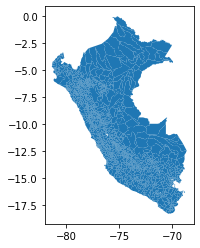

In [218]:
distritos_peru.plot()

In [219]:
distritos_peru.head()

,IDDPTO,DEPARTAMEN,IDPROV,PROVINCIA,IDDIST,DISTRITO,CAPITAL,CODCCPP,AREA,FUENTE,geometry
0,10,HUANUCO,1009,PUERTO INCA,100902,CODO DEL POZUZO,CODO DEL POZUZO,0001,1,INEI,"POLYGON ((-75.31797 -9.29529, -75.31710 -9.297..."
1,10,HUANUCO,1009,PUERTO INCA,100904,TOURNAVISTA,TOURNAVISTA,0001,1,INEI,"POLYGON ((-74.64136 -8.82302, -74.64036 -8.828..."
2,25,UCAYALI,2503,PADRE ABAD,250305,ALEXANDER VON HUMBOLDT,ALEXANDER VON HUMBOLDT,0001,1,INEI,"POLYGON ((-75.02253 -8.74193, -75.02267 -8.742..."
3,25,UCAYALI,2503,PADRE ABAD,250302,IRAZOLA,SAN ALEJANDRO,0001,1,INEI,"POLYGON ((-75.13864 -8.56712, -75.13956 -8.569..."
4,25,UCAYALI,2503,PADRE ABAD,250304,NESHUYA,MONTE ALEGRE,0001,1,INEI,"POLYGON ((-75.01589 -8.44637, -75.01585 -8.446..."


In [251]:
distritos_peru_proj = project_gdf(distritos_peru)

In [295]:
rucs.columns

Index(['ruc', 'RAZON_SOCIAL', 'NOMBRE_COMERCIAL', 'CODIGO_TIPO_VIA',
       'DESCRIPCION_TIPO_VIA', 'NOMBRE_VIA', 'PUERTA', 'MANZANA', 'LOTE',
       'PISO', 'INTERIOR', 'DIR_DPTO', 'KILOMETRO', 'REFERENCIA',
       'DIR_TIPOZONA', 'tipo_zona', 'DIR_NOMZONA', 'CNS_UBIGEO',
       'CNS_ZONA_CENSAL', 'CNS_MZ_CENSAL', 'CNS_MZSUF_CENSAL', 'CNS_FRENTE',
       'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'CAPITAL', 'codigo_prov',
       'Region', 'CODODEI', 'ODEI', 'UBIGEO'],
      dtype='object')

In [300]:
rucs.head()

,ruc,RAZON_SOCIAL,NOMBRE_COMERCIAL,CODIGO_TIPO_VIA,DESCRIPCION_TIPO_VIA,NOMBRE_VIA,PUERTA,MANZANA,LOTE,PISO,...,CNS_FRENTE,DEPARTAMENTO,PROVINCIA,DISTRITO,CAPITAL,codigo_prov,Region,CODODEI,ODEI,UBIGEO
0,2.010000e+10,COCINA DE VUELO DOCAMPO S.A.C.,-,03,JIRON,APURIMAC,521,-,-,,...,,CALLAO,CALLAO,CALLAO,CALLAO,0701,07 Callao,15,Lima,070101
1,2.010000e+10,COMFER S A,,01,AVENIDA,ARGENTINA,1646,-,-,,...,,CALLAO,CALLAO,CALLAO,CALLAO,0701,07 Callao,15,Lima,070101
2,2.010000e+10,CROSLAND TECNICA S.A.,-,01,AVENIDA,AUGUSTO PEREZ ARANIBAR,1872,-,-,,...,,LIMA,LIMA,SAN ISIDRO,SAN ISIDRO,1501,15 Provincia de Lima,15,Lima,150131
3,2.010000e+10,FUNDICION CALLAO S.A.,,01,AVENIDA,ARGENTINA,3719,-,-,,...,,CALLAO,CALLAO,CALLAO,CALLAO,0701,07 Callao,15,Lima,070101
4,2.010000e+10,KOMFORT S A,-,05,CARRETERA,ANTIGUA PANAMERICANA SUR,-,-,-,,...,,LIMA,LIMA,VILLA EL SALVADOR,VILLA EL SALVADOR,1501,15 Provincia de Lima,15,Lima,150142


In [294]:
distritos_peru_proj.columns

Index(['IDDPTO', 'DEPARTAMEN', 'IDPROV', 'PROVINCIA', 'IDDIST', 'DISTRITO',
       'CAPITAL', 'CODCCPP', 'AREA', 'FUENTE', 'geometry'],
      dtype='object')

In [299]:
distritos_peru_proj.head()

,IDDPTO,DEPARTAMEN,IDPROV,PROVINCIA,IDDIST,DISTRITO,CAPITAL,CODCCPP,AREA,FUENTE,geometry
0,10,HUANUCO,1009,PUERTO INCA,100902,CODO DEL POZUZO,CODO DEL POZUZO,0001,1,INEI,"POLYGON ((465079.270 -1027514.387, 465174.520 ..."
1,10,HUANUCO,1009,PUERTO INCA,100904,TOURNAVISTA,TOURNAVISTA,0001,1,INEI,"POLYGON ((539439.186 -975305.103, 539548.429 -..."
2,25,UCAYALI,2503,PADRE ABAD,250305,ALEXANDER VON HUMBOLDT,ALEXANDER VON HUMBOLDT,0001,1,INEI,"POLYGON ((497522.027 -966320.757, 497506.328 -..."
3,25,UCAYALI,2503,PADRE ABAD,250302,IRAZOLA,SAN ALEJANDRO,0001,1,INEI,"POLYGON ((484744.000 -946997.000, 484642.260 -..."
4,25,UCAYALI,2503,PADRE ABAD,250304,NESHUYA,MONTE ALEGRE,0001,1,INEI,"POLYGON ((498251.163 -933645.324, 498255.086 -..."


In [309]:
rucs_with_district_polygon = rucs.loc[gdf.index].merge(
    distritos_peru_proj[['IDPROV', 'DISTRITO', 'geometry']], how='left',
    left_on=['codigo_prov', 'CAPITAL'], 
    right_on=['IDPROV', 'DISTRITO'])

In [388]:
rucs_with_district_polygon['IDPROV'].str.lower().unique().shape

(190,)

In [390]:
distritos_peru_proj['IDPROV'].str.lower().value_counts().index[
    ~distritos_peru_proj['IDPROV'].str.lower().value_counts().index.isin(rucs_with_district_polygon['codigo_prov'].str.lower().unique())].shape

(2,)

In [370]:
rucs_with_district_polygon['CAPITAL'].str.lower().unique().shape

(1023,)

In [ ]:
distritos_peru_proj['DISTRITO'].str.lower().value_counts().index[
    ~distritos_peru_proj['DISTRITO'].str.lower().value_counts().index.isin(rucs_with_district_polygon['CAPITAL'].str.lower().unique())].shape

(851,)

In [322]:
rucs_with_district_polygon = gpd.GeoDataFrame(rucs_with_district_polygon, 
                                              crs=distritos_peru_proj.crs)

In [323]:
gdf.shape, rucs_with_district_polygon.shape

((191736, 22), (191736, 34))

In [324]:
type(rucs_with_district_polygon['geometry'])

geopandas.geoseries.GeoSeries

In [325]:
from osmnx import project_gdf

In [326]:
gdf_proj = project_gdf(gdf)

In [327]:
gdf_proj.crs

<Derived Projected CRS: +proj=utm +zone=18 +ellps=WGS84 +datum=WGS84 +unit ...>
Name: unknown
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 18N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [328]:
distritos_peru_proj.crs == gdf_proj.crs

True

In [329]:
gdf_proj.shape

(191736, 22)

In [331]:
distance_to_district_meters = gdf_proj.distance(rucs_with_district_polygon['geometry'],
                                                align=False)

In [332]:
distance_to_district_km = distance_to_district_meters / 1000

In [334]:
gdf['distance_km_to_capital'] = distance_to_district_km 

In [342]:
gdf['distance_km_to_capital'].describe()

count    149911.000000
mean         15.890625
std         111.916738
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        1832.415902
Name: distance_km_to_capital, dtype: float64

<AxesSubplot:>

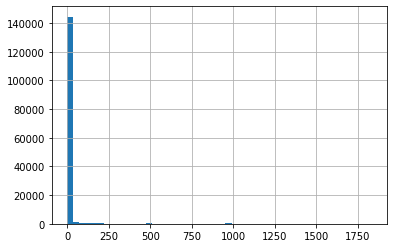

In [345]:
gdf['distance_km_to_capital'].hist(bins=50)

In [339]:
gdf['distance_km_to_capital'].isna().sum()

41825

In [374]:
distance_cols = gdf.columns[gdf.columns.str.contains('distance')]

In [375]:
gdf[distance_cols].describe()

,distance_to_cp,nearest_infraestucture_distance_km,nearest_airports_distance_km,nearest_ports_distance_km,distance_km_to_lima,distance_km_to_district,distance_km_to_capital
count,191736.000000,191736.000000,191736.000000,191736.000000,191736.000000,149911.000000,149911.000000
mean,296.136361,0.299868,22.321819,57.659447,247.705166,15.890625,15.890625
std,2408.907425,0.296248,33.334685,85.095898,320.932753,111.916738,111.916738
min,0.000000,0.001027,0.043287,0.080503,0.031612,0.000000,0.000000
25%,0.000000,0.106801,6.960482,13.024669,14.794946,0.000000,0.000000
50%,0.000000,0.168075,11.859614,19.461194,20.093464,0.000000,0.000000
75%,0.000000,0.472145,18.845717,66.660129,494.609755,0.000000,0.000000
max,257950.935806,3.798013,237.548675,654.502156,1317.784630,1832.415902,1832.415902


In [385]:
gdf['Name']

73740     0103070001 PEDRO RUIZ GALLO
36523     0103070001 PEDRO RUIZ GALLO
103983    0103070001 PEDRO RUIZ GALLO
141261    0103070001 PEDRO RUIZ GALLO
229733    0103070001 PEDRO RUIZ GALLO
                     ...             
173828               1201120001 COLCA
230068        1201160001 HUACRAPUQUIO
12497                0502060001 TOTOS
12658                0502060001 TOTOS
227788        2208070001 SAN FERNANDO
Name: Name, Length: 191736, dtype: object

In [377]:
gdf.columns

Index(['IDMANZANA', 'lon', 'lat', 'dataset', 'place_id', 'osm_type', 'osm_id',
       'display_name', 'class', 'type', 'geometry', 'index_right', 'Name',
       'distance_to_cp', 'nearest_infraestucture_ix',
       'nearest_infraestucture_distance_km', 'nearest_airports_ix',
       'nearest_airports_distance_km', 'nearest_ports_ix',
       'nearest_ports_distance_km', 'distance_km_to_lima',
       'distance_km_to_district', 'distance_km_to_capital'],
      dtype='object')

In [382]:
rucs.columns

Index(['ruc', 'RAZON_SOCIAL', 'NOMBRE_COMERCIAL', 'CODIGO_TIPO_VIA',
       'DESCRIPCION_TIPO_VIA', 'NOMBRE_VIA', 'PUERTA', 'MANZANA', 'LOTE',
       'PISO', 'INTERIOR', 'DIR_DPTO', 'KILOMETRO', 'REFERENCIA',
       'DIR_TIPOZONA', 'tipo_zona', 'DIR_NOMZONA', 'CNS_UBIGEO',
       'CNS_ZONA_CENSAL', 'CNS_MZ_CENSAL', 'CNS_MZSUF_CENSAL', 'CNS_FRENTE',
       'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'CAPITAL', 'codigo_prov',
       'Region', 'CODODEI', 'ODEI', 'UBIGEO'],
      dtype='object')

In [403]:
relevant_vars = ['lon', 'lat', 'dataset', 'place_id', 'osm_type', 'osm_id',
    'display_name', 'class', 'type',
    'distance_to_cp', 'nearest_infraestucture_ix',
    'nearest_infraestucture_distance_km', 'nearest_airports_ix',
    'nearest_airports_distance_km', 'nearest_ports_ix',
    'nearest_ports_distance_km', 'distance_km_to_lima',
    'distance_km_to_district', 'distance_km_to_capital', 'geometry']

In [404]:
rucs_final_df = rucs.merge(gdf[relevant_vars], how='left', left_index=True, right_index=True)

In [406]:
rucs_final_df.drop('geometry', axis=1).to_csv('outputs/rucs_final_df.csv')

In [407]:
rucs_final_gdf = gpd.GeoDataFrame(rucs_final_df, crs=gdf.crs)

In [433]:
rucs_final_gdf['distance_km_to_cp'] = rucs_final_gdf['distance_to_cp'] / 1000

In [434]:
agg = {'distance_km_to_cp': 'mean',
       'nearest_infraestucture_distance_km': 'mean',
       'nearest_airports_distance_km': 'mean',
       'nearest_ports_distance_km': 'mean',
       'distance_km_to_lima': 'mean',
       'distance_km_to_capital': 'mean',
       'count': 'sum'}

# Count points per hexagon
rucs_final_gdf['count'] = 1
peru_hexs_counts = up.geom.merge_shape_hex(peru_hexs, rucs_final_gdf, agg=agg)

/Users/claudio/.pyenv/versions/peru-connect-env/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3369: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [435]:
peru_hexs_counts.shape

(634, 9)

In [436]:
res

4

In [437]:
import contextily as cx

In [438]:
minx, miny, maxx, maxy = peru_hexs.total_bounds

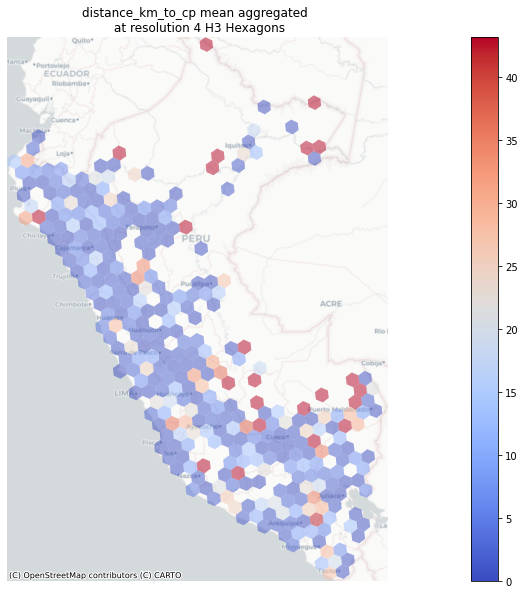

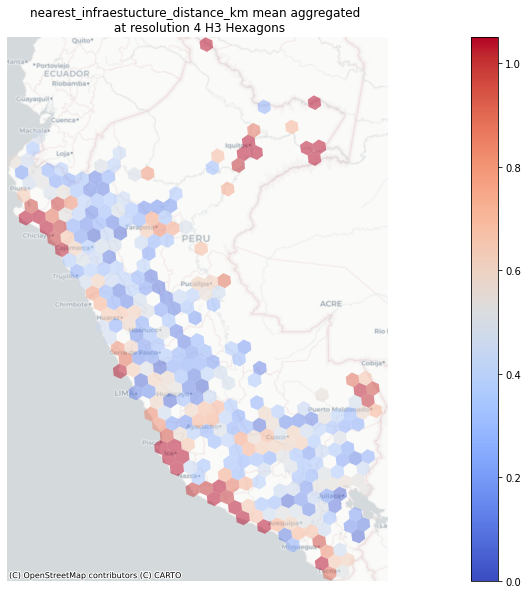

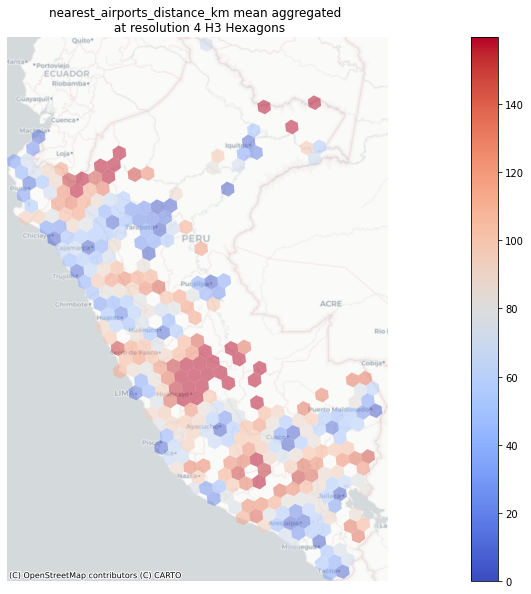

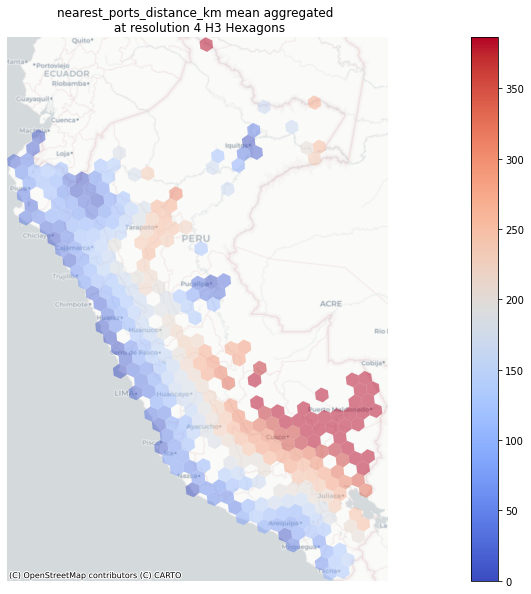

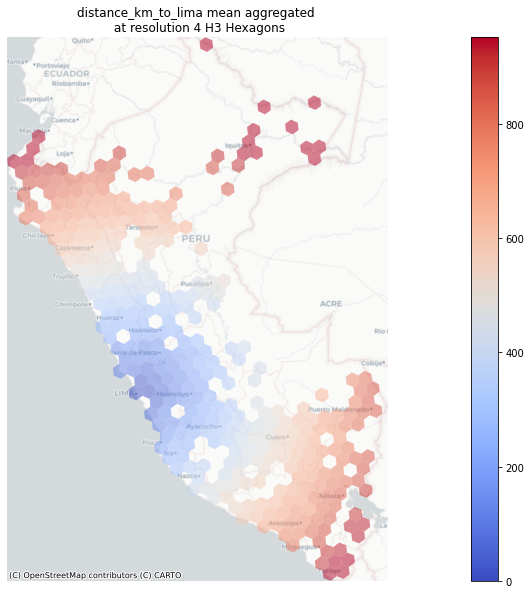

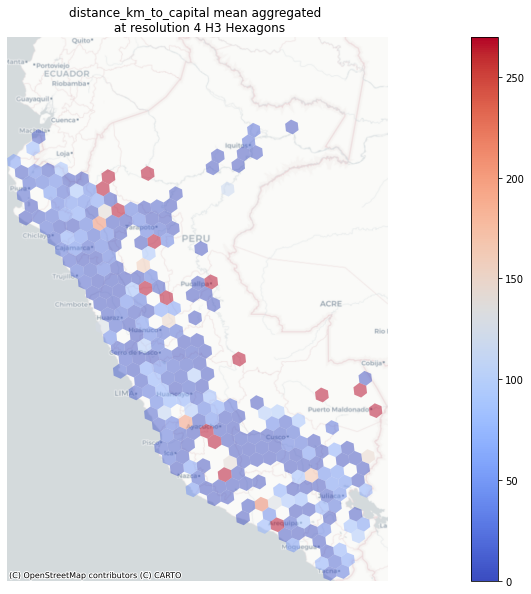

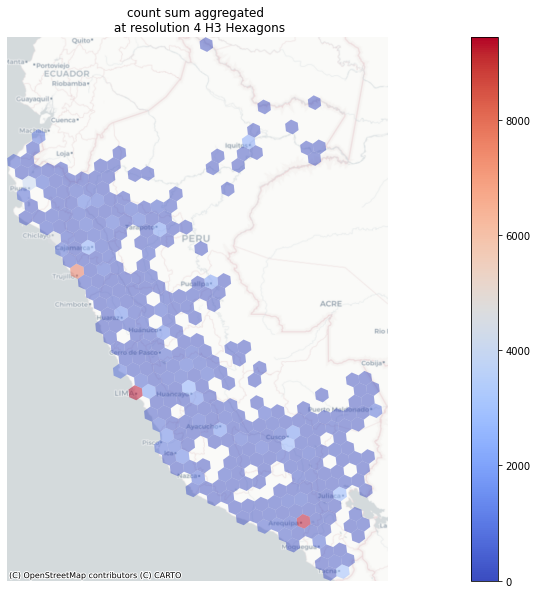

In [442]:
for col, agg_method in agg.items():
    vmax = peru_hexs_counts[col].mean() + (1.5 * peru_hexs_counts[col].std())
    
    ax = peru_hexs_counts.plot(col, vmin=0, vmax=vmax, figsize=(30,10),
                               legend=True, alpha=0.5, cmap='coolwarm')
    ax.set_xlim(minx, maxx)
    ax.set_ylim(miny, maxy)
    cx.add_basemap(ax, crs=rucs_final_gdf.crs, source=cx.providers.CartoDB.Positron)
    ax.set_axis_off()
    ax.set_title(f'{col} {agg_method} aggregated \n at resolution {res} H3 Hexagons')
    plt.show()